<a href="https://colab.research.google.com/github/arudhatt/airbnb_data_analysis/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring the Landscape of Airbnb: A Data-Driven Journey
In recent years, Airbnb has revolutionized the way people travel, offering unique accommodation options and experiences in destinations across the globe. This project aims to delve into the rich dataset provided by Kaggle to uncover insights, patterns, and trends that characterize the platform's ecosystem. By leveraging data visualization techniques and statistical analysis, I seek to gain a comprehensive understanding of various aspects such as pricing dynamics, property types, geographical distribution, and user preferences. Then I use XGBoost and CatBoost to predict the log_price.

The primary objective of this project is to extract actionable insights from the Airbnb dataset through exploratory analysis. Key goals include:

* Understanding the distribution of Airbnb listings across different regions.

* Exploring the relationship between listing attributes (e.g., location, property type, amenities) and pricing.

* Identifying trends in user behavior and preferences.

* Predicting the log price using a data model.










In [1]:
import pandas as pd
import numpy as np

### Load the dataset
Import the dataset from csv file to a pandas dataframe object. Pandas dataframe provides functionality to better understand the data, like the function info(), which provides information about data like number of rows and columns in the dataframe and data type of each column. Also, let us display a few rows to get a brief sense about our data.

In [2]:
df = pd.read_csv('Airbnb_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


### Summary statistics
The first step in any exploratory data analysis is to perform summary statistics, because they offer a quick overview of data characteristics, aiding in initial understanding, pattern identification, and comparative analysis. They help in data cleaning, assumption checking, and decision-making processes by summarizing large datasets, identifying anomalies, and supporting hypotheses with quantitative evidence.

In [5]:
# Summary statistics for numerical attributes
df.select_dtypes(include=[np.number]).describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [6]:
# Summary statistics for categorical attributes
df.select_dtypes(include=['object']).describe()

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111,67239,65895,73145
unique,35,3,67122,5,5,6,73479,2554,2,2,80,3087,2,1371,73359,619,65883,769
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,49003,41310,586,72028,32374,32349,8,293,73697,49748,43254,246,54660,1344,8,2862,3,1368


### Cleaning Data
Cleaning data is a critical step in exploratory data analysis (EDA) to ensure the data's quality and reliability. For our project, handling missing values by filling those in with standard values, is enough. As as additional step, let us convert host_response_rate to numeric.

In [7]:
# check NaN.
nan_counts = df.isnull().sum().to_frame('nan_count')
total_rows = df.shape[0]

#  NAN Ratio.
nan_counts['nan_percentage'] = (nan_counts['nan_count'] / total_rows) * 100
nan_counts

,nan_count,nan_percentage
id,0,0.000000
log_price,0,0.000000
property_type,0,0.000000
room_type,0,0.000000
amenities,0,0.000000
accommodates,0,0.000000
bathrooms,200,0.269865
bed_type,0,0.000000
cancellation_policy,0,0.000000
cleaning_fee,0,0.000000


In [8]:
# Replace missing values in numerical columns with the median value of each column
for column in ['bathrooms', 'bedrooms', 'beds']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)
    # Create a new column to indicate the presence of missing values in the original column
    df[column + '_missing'] = df[column].isnull().astype(int)

In [9]:
# Drop columns that are not necessary or have a high percentage of missing values
drop_columns = ['zipcode', 'thumbnail_url', 'last_review', 'first_review', 'host_since']
df.drop(drop_columns, axis=1, inplace=True)

In [10]:
# Handle missing values in 'review_scores_rating'
# If the number of reviews is zero, replace missing values with the median score of such listings
median_rating_when_no_reviews = df[df['number_of_reviews'] == 0]['review_scores_rating'].median()
df.loc[df['number_of_reviews'] == 0, 'review_scores_rating'].fillna(median_rating_when_no_reviews, inplace=True)


# For remaining missing values in 'review_scores_rating', fill with the overall median of the column
median_rating = df['review_scores_rating'].median()
df['review_scores_rating'].fillna(median_rating, inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
# Replace missing values in 'neighbourhood' based on the nearest geographical location
from sklearn.neighbors import NearestNeighbors

coords = df.loc[df['neighbourhood'].notnull(), ['latitude', 'longitude']]
neighbourhoods = df.loc[df['neighbourhood'].notnull(), 'neighbourhood']


# Train a Nearest Neighbors model on these coordinates
nbrs = NearestNeighbors(n_neighbors=1).fit(coords.values)


# Identify coordinates with missing 'neighbourhood' data
missing_coords = df.loc[df['neighbourhood'].isnull(), ['latitude', 'longitude']]


# Find the index of the nearest neighbor for each point with missing 'neighbourhood'
indices = nbrs.kneighbors(missing_coords.values, return_distance=False)

# Fill missing 'neighbourhood' values with the 'neighbourhood' of the nearest neighbor
df.loc[df['neighbourhood'].isnull(), 'neighbourhood'] = neighbourhoods.iloc[indices.flatten()].values

In [12]:
# Fill host_response_rate with 0% and Convert host_response_rate values to numeric
df['host_response_rate'].fillna('0%', inplace=True)
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(int)

In [13]:
# Summarize key statistics for numerical attributes after handling missing values
df.select_dtypes(include=[np.number]).describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,bathrooms_missing,bedrooms_missing,beds_missing
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.0,74111.0,74111.0
mean,1.126662e+07,4.782069,3.155146,1.234628,71.055201,38.445958,-92.397525,20.900568,94.503434,1.265467,1.709611,0.0,0.0,0.0
std,6.081735e+06,0.717394,2.153589,0.581386,43.087044,3.080167,21.705322,37.828641,6.943159,0.851671,1.253389,0.0,0.0,0.0
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,0.0,0.0,0.0
25%,6.261964e+06,4.317488,2.000000,1.000000,0.000000,34.127908,-118.342374,1.000000,93.000000,1.000000,1.000000,0.0,0.0,0.0
50%,1.225415e+07,4.709530,2.000000,1.000000,100.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000,0.0,0.0,0.0
75%,1.640226e+07,5.220356,4.000000,1.000000,100.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000,0.0,0.0,0.0
max,2.123090e+07,7.600402,16.000000,8.000000,100.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,0.0,0.0,0.0


In [14]:
# Summarize key statistics for categorical attributes after handling missing values
df.select_dtypes(include=['object']).describe()

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,instant_bookable,name,neighbourhood
count,74111,74111,74111,74111,74111,74111,74111,73923,73923,74111,74111,74111
unique,35,3,67122,5,5,6,73479,2,2,2,73359,619
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",t,t,f,Bunk bed in the Treat Street Clubhouse,Williamsburg
freq,49003,41310,586,72028,32374,32349,8,73697,49748,54660,8,2862


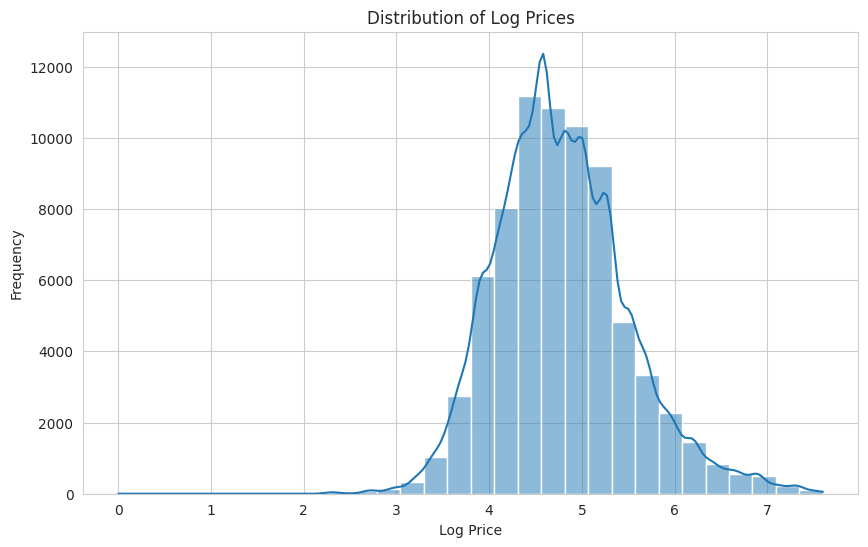

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of log prices
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=30, kde=True)
plt.title('Distribution of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

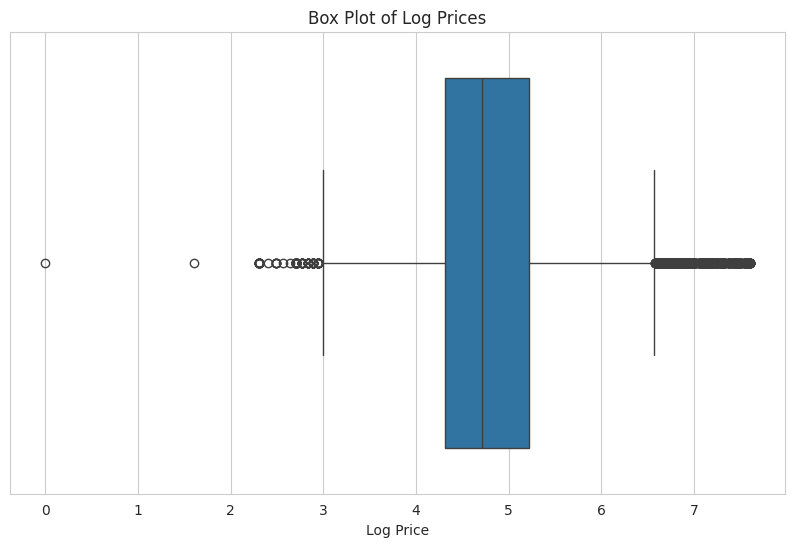

In [16]:
# Box plot of log prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_price'])
plt.title('Box Plot of Log Prices')
plt.xlabel('Log Price')
plt.show()

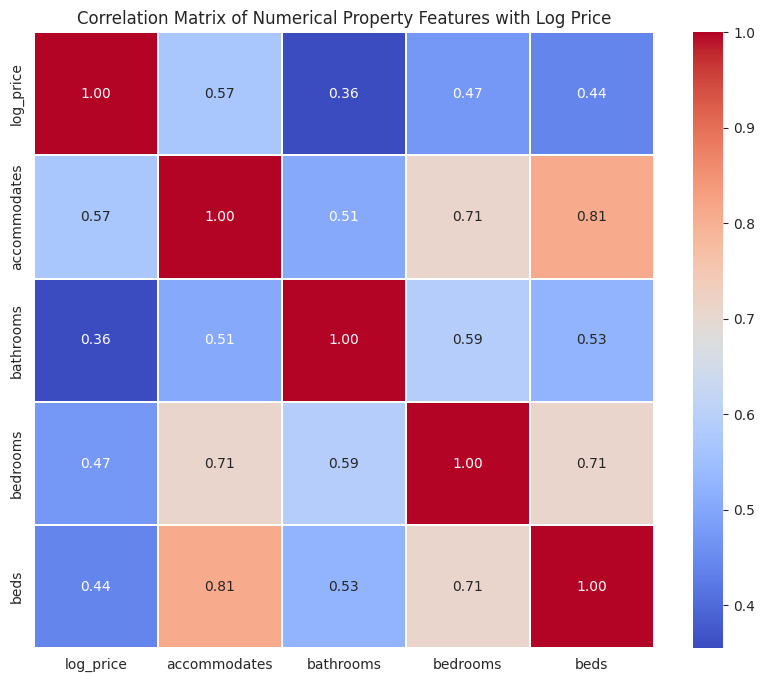

In [17]:
# Exploring the relationship between price and property features using scatter plots and correlation matrices

# Selecting numerical columns that are relevant to the property features
numerical_features = df[['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds']]
correlation_matrix = numerical_features.corr()

# Displaying the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Numerical Property Features with Log Price')
plt.show()

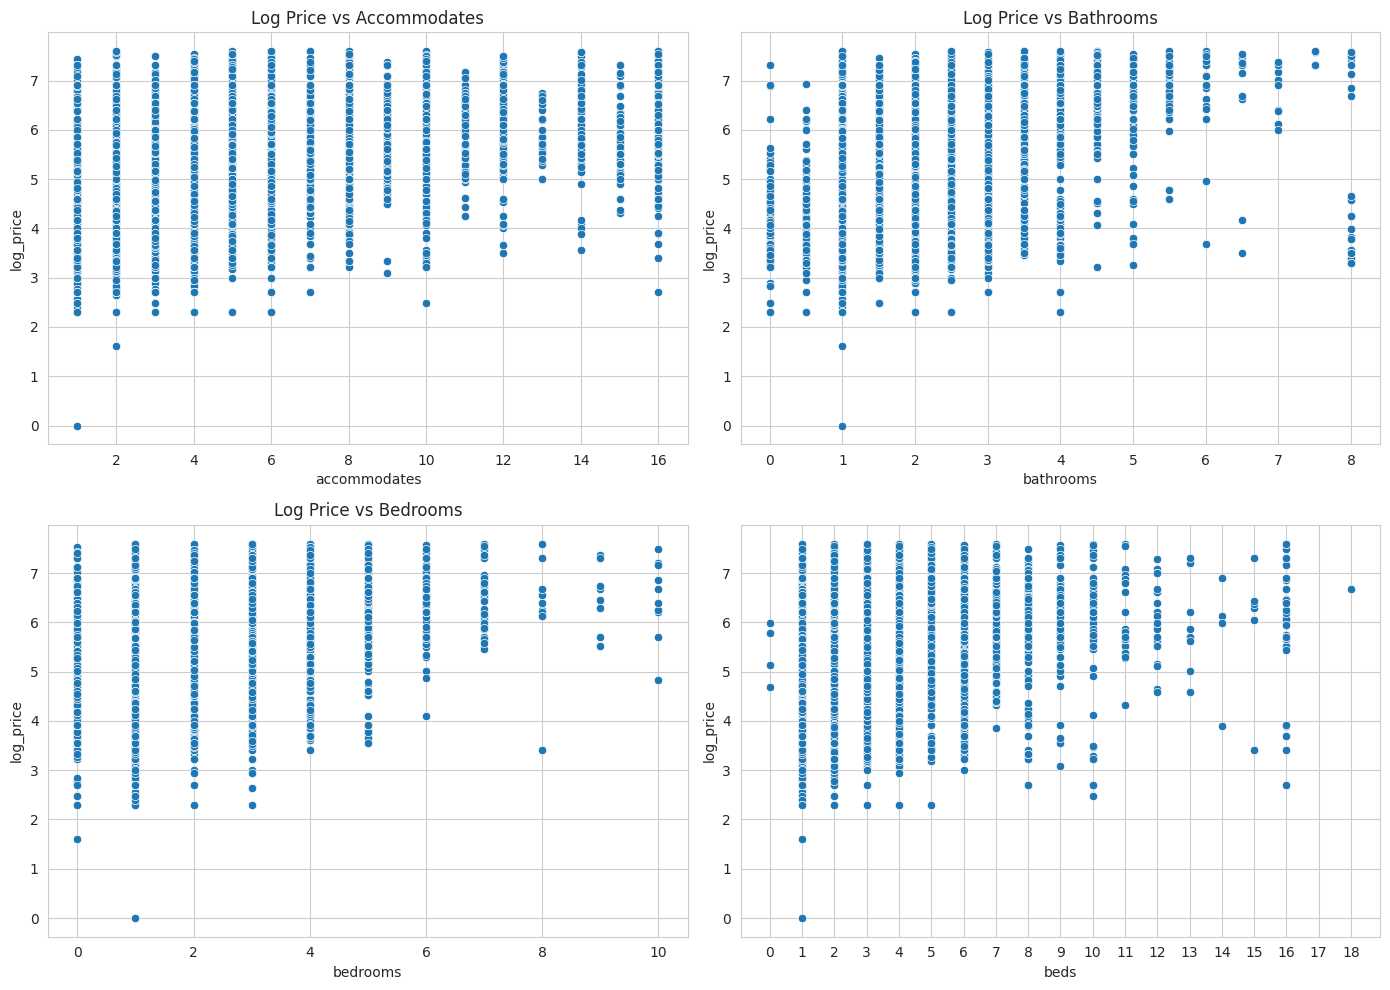

In [18]:
# Scatter plots to visualize the relationship between log_price and other numerical property features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(ax=axes[0, 0], data=df, x='accommodates', y='log_price')
axes[0, 0].set_title('Log Price vs Accommodates')

sns.scatterplot(ax=axes[0, 1], data=df, x='bathrooms', y='log_price')
axes[0, 1].set_title('Log Price vs Bathrooms')

sns.scatterplot(ax=axes[1, 0], data=df, x='bedrooms', y='log_price')
axes[1, 0].set_title('Log Price vs Bedrooms')

sns.scatterplot(ax=axes[1, 1], data=df, x='beds', y='log_price')
axes[1, 1].set_xticks(np.arange(min(df['beds']), max(df['beds'])+1, 1))

plt.tight_layout()
plt.show()

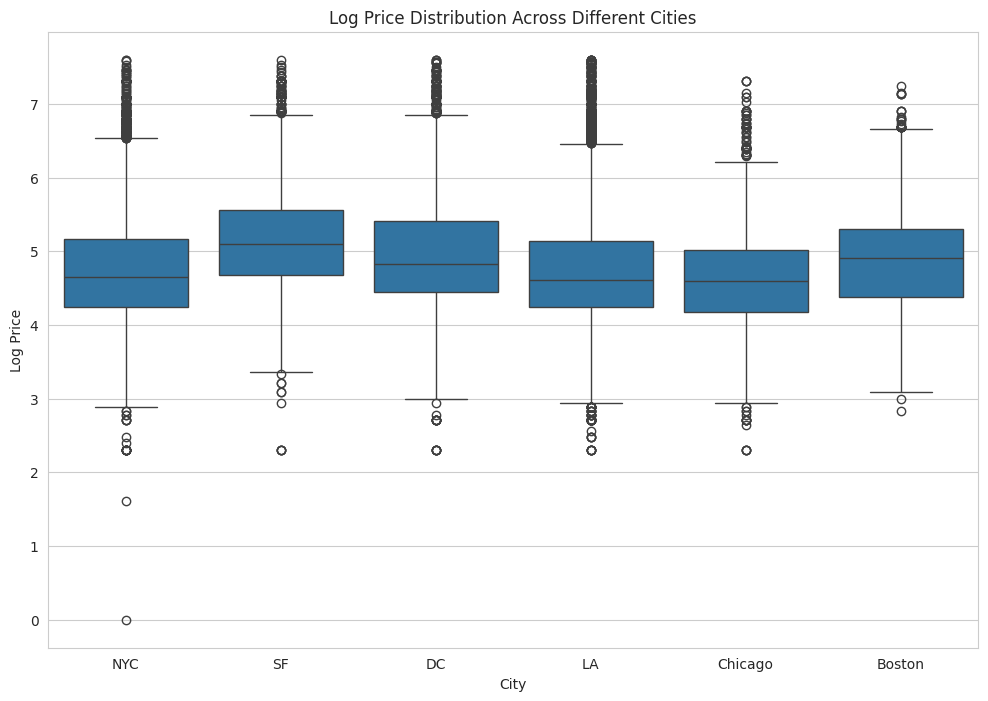

In [19]:
# Investigate price variation across different cities or neighborhoods
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='log_price', data=df)
plt.title('Log Price Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Log Price')
plt.show()

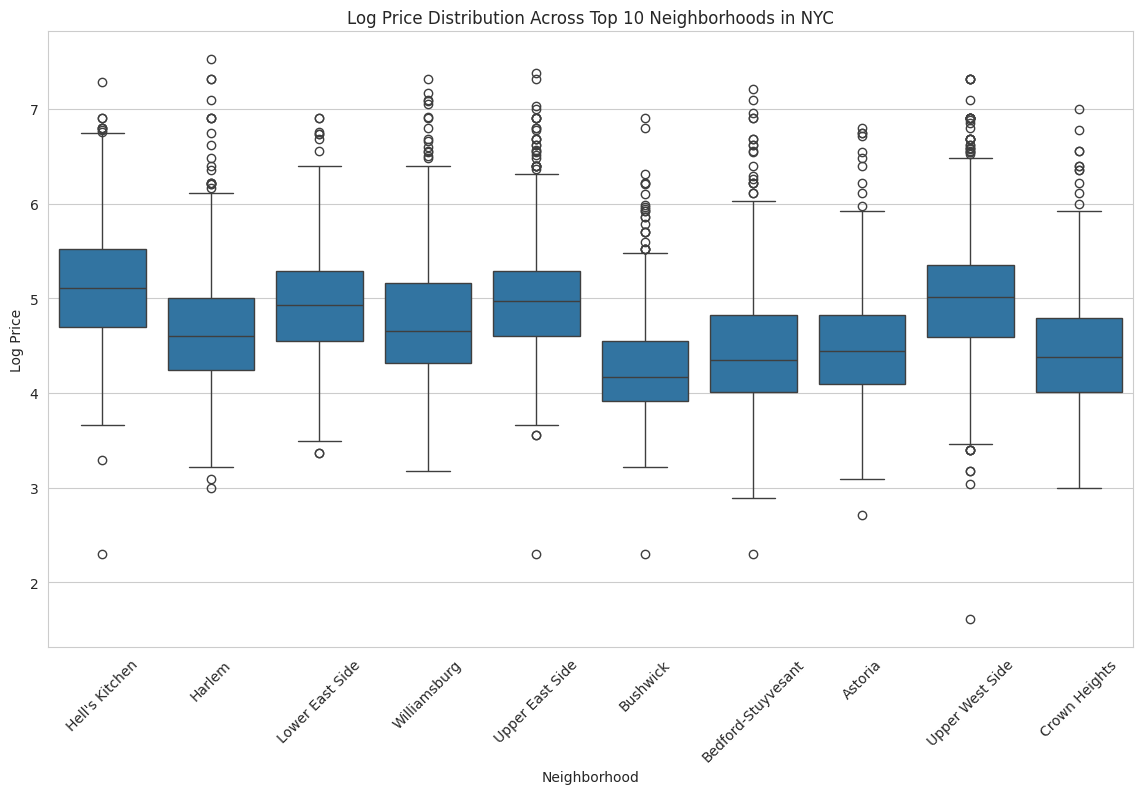

In [20]:
# Analyzing price variation across neighborhoods for a specific city (e.g., New York City)
nyc_data = df[df['city'] == 'NYC']
top_neighbourhoods = nyc_data['neighbourhood'].value_counts().head(10).index
nyc_top_neighbourhoods_data = nyc_data[nyc_data['neighbourhood'].isin(top_neighbourhoods)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='log_price', data=nyc_top_neighbourhoods_data)
plt.title('Log Price Distribution Across Top 10 Neighborhoods in NYC')
plt.xlabel('Neighborhood')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()

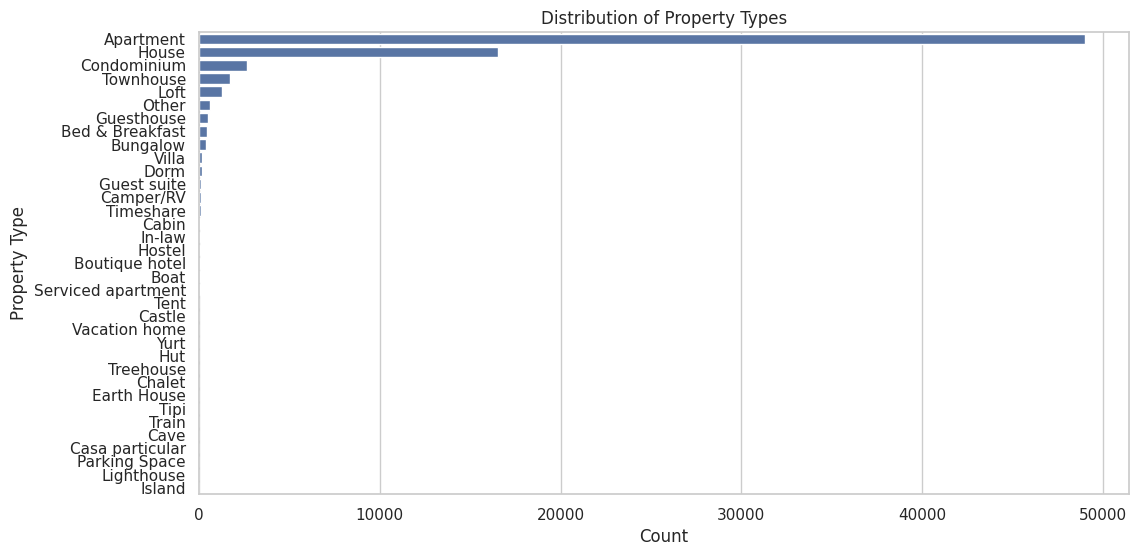

In [21]:
# Analyzing the distribution and popularity of property types and room types across various locations

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of Property Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

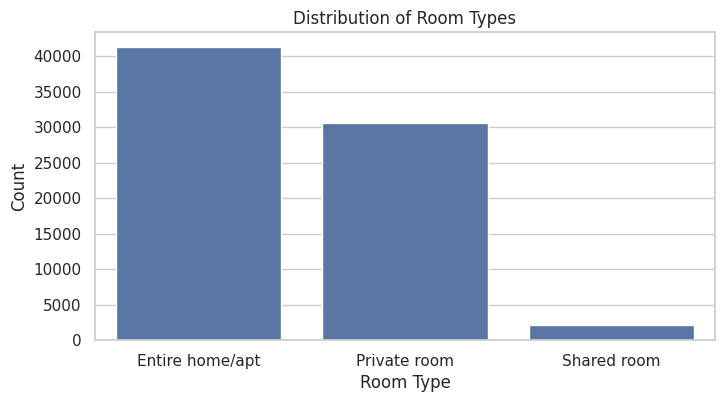

In [22]:
# Distribution of Room Types
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

In [23]:
frequent_list = df['property_type'].value_counts().head(10).index.tolist()
edited_df = df[df['property_type'].isin(frequent_list)]

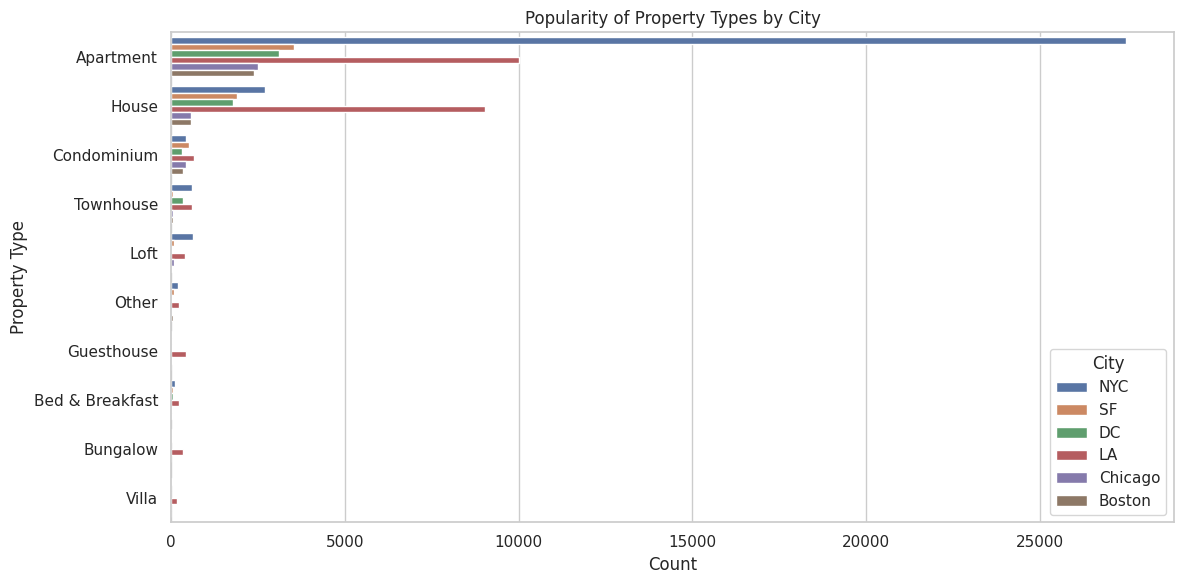

In [24]:
# Popularity of Property Types by City
plt.figure(figsize=(12, 6))
sns.countplot(data=edited_df, y='property_type', hue='city', order=edited_df['property_type'].value_counts().index)
plt.title('Popularity of Property Types by City')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.legend(title='City')
plt.tight_layout()
plt.show()

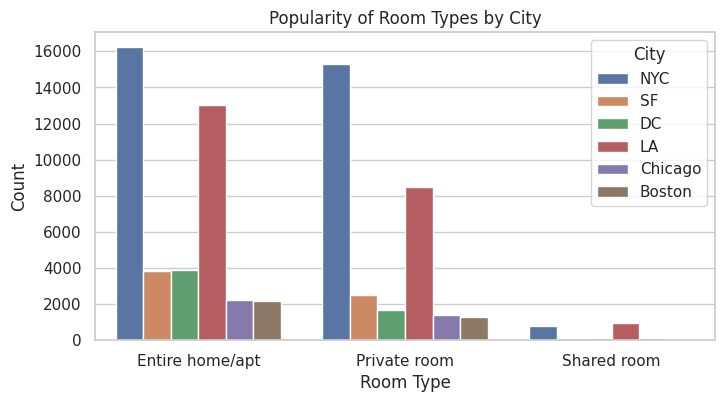

In [25]:
# Popularity of Room Types by City
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='room_type', hue='city', order=df['room_type'].value_counts().index)
plt.title('Popularity of Room Types by City')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()

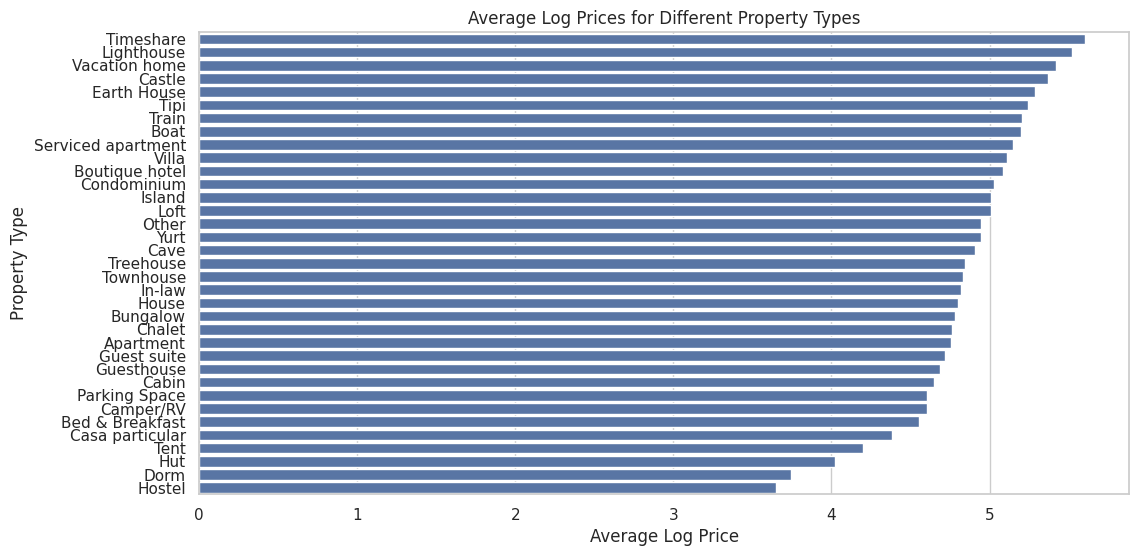

In [26]:
# Average Prices for Different Property Types
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='property_type', x='log_price', estimator=np.mean, errorbar=None, order=df.groupby('property_type')['log_price'].mean().sort_values(ascending=False).index)
plt.title('Average Log Prices for Different Property Types')
plt.xlabel('Average Log Price')
plt.ylabel('Property Type')
plt.show()

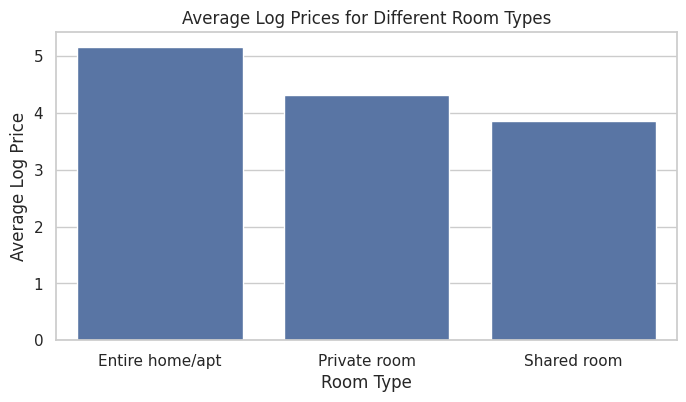

In [27]:
# Average Prices for Different Room Types
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='room_type', y='log_price', estimator=np.mean, errorbar=None, order=df.groupby('room_type')['log_price'].mean().sort_values(ascending=False).index)
plt.title('Average Log Prices for Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Average Log Price')
plt.show()

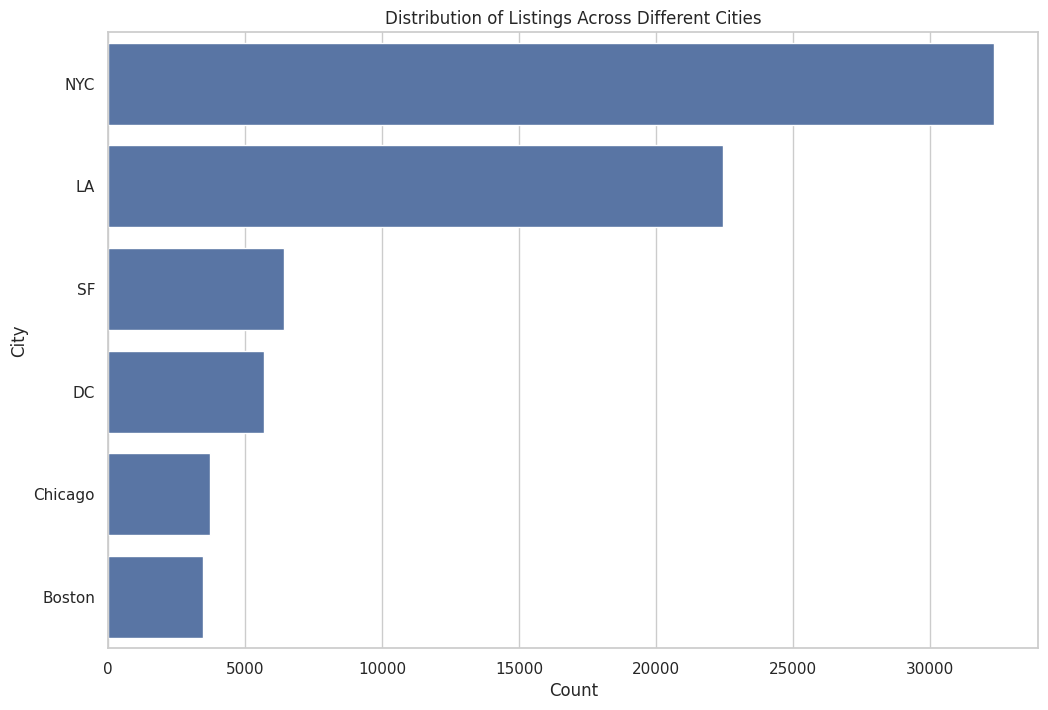

In [28]:
# Analyzing the distribution of listings across different cities and neighborhoods
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='city', order=df['city'].value_counts().index)
plt.title('Distribution of Listings Across Different Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

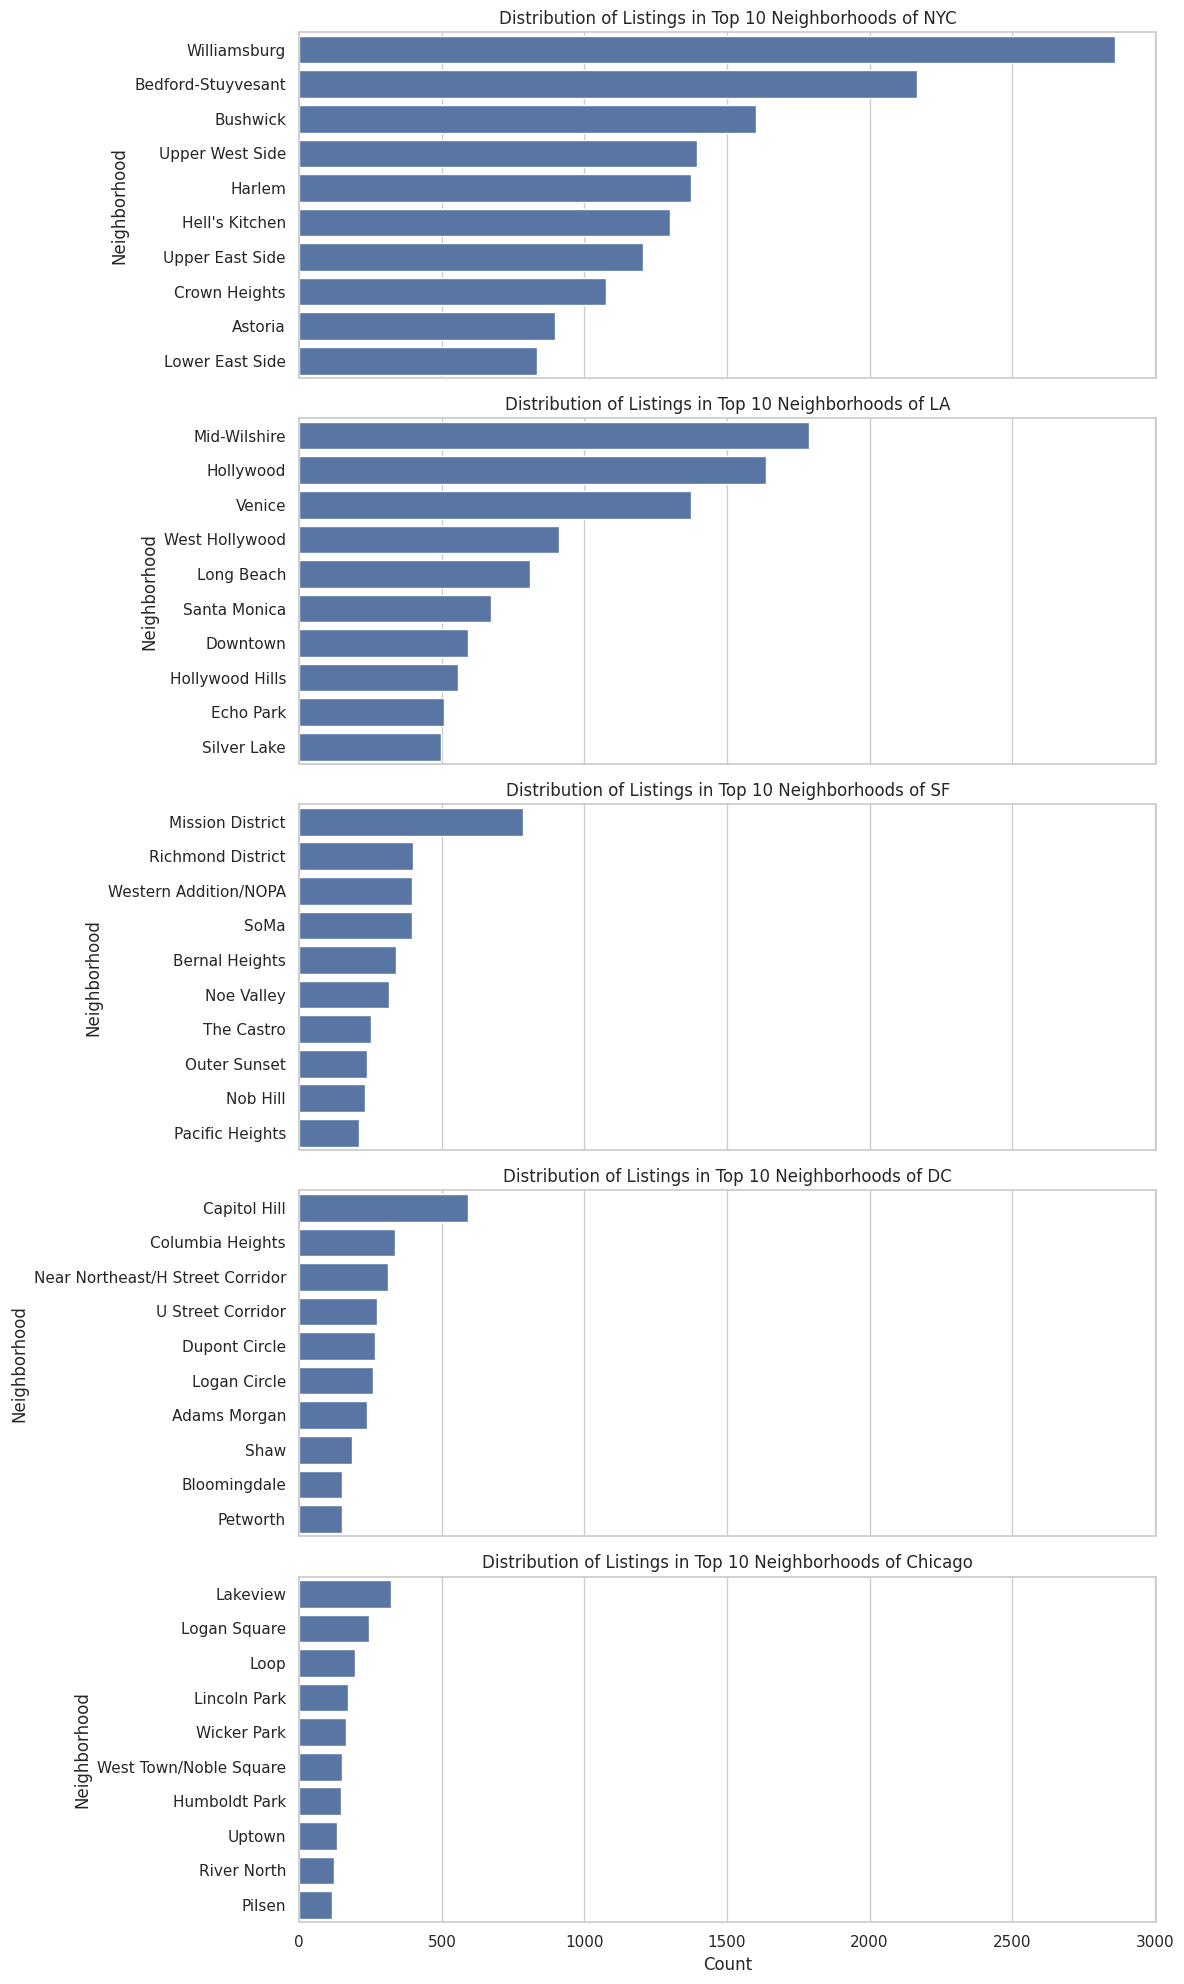

In [29]:
# Analyzing the distribution of listings in neighborhoods for the top cities
top_cities = df['city'].value_counts().head(5).index.tolist()
fig, axes = plt.subplots(len(top_cities), 1, figsize=(12, 20), sharex=True)

for i, city in enumerate(top_cities):
    city_data = df[df['city'] == city]
    sns.countplot(ax=axes[i], data=city_data, y='neighbourhood', order=city_data['neighbourhood'].value_counts().head(10).index)
    axes[i].set_title(f'Distribution of Listings in Top 10 Neighborhoods of {city}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Neighborhood')

plt.tight_layout()
plt.show()

In [30]:
# amenities to list
from collections import Counter
def parse_amenities(amenities_str):
    # erase {}, '' , ""
    try:
        amenities_str = amenities_str.strip('{}').replace('"', '')
        amenities_list = amenities_str.split(',')
        return [amenity.strip() for amenity in amenities_list]
    except Exception as e:
        print(f"Error parsing amenities: {e}")
        return []

df['amenities'] = df['amenities'].apply(parse_amenities)

# gethering
all_amenities = [amenity for sublist in df['amenities'] for amenity in sublist]

# frequnecy
amenity_counts = Counter(all_amenities)

# top 15
print(amenity_counts.most_common(15))

[('Wireless Internet', 71265), ('Kitchen', 67526), ('Heating', 67073), ('Essentials', 64005), ('Smoke detector', 61727), ('Air conditioning', 55210), ('TV', 52458), ('Shampoo', 49465), ('Hangers', 49173), ('Carbon monoxide detector', 47190), ('Internet', 44648), ('Laptop friendly workspace', 43703), ('Hair dryer', 43330), ('Washer', 43169), ('Dryer', 42711)]


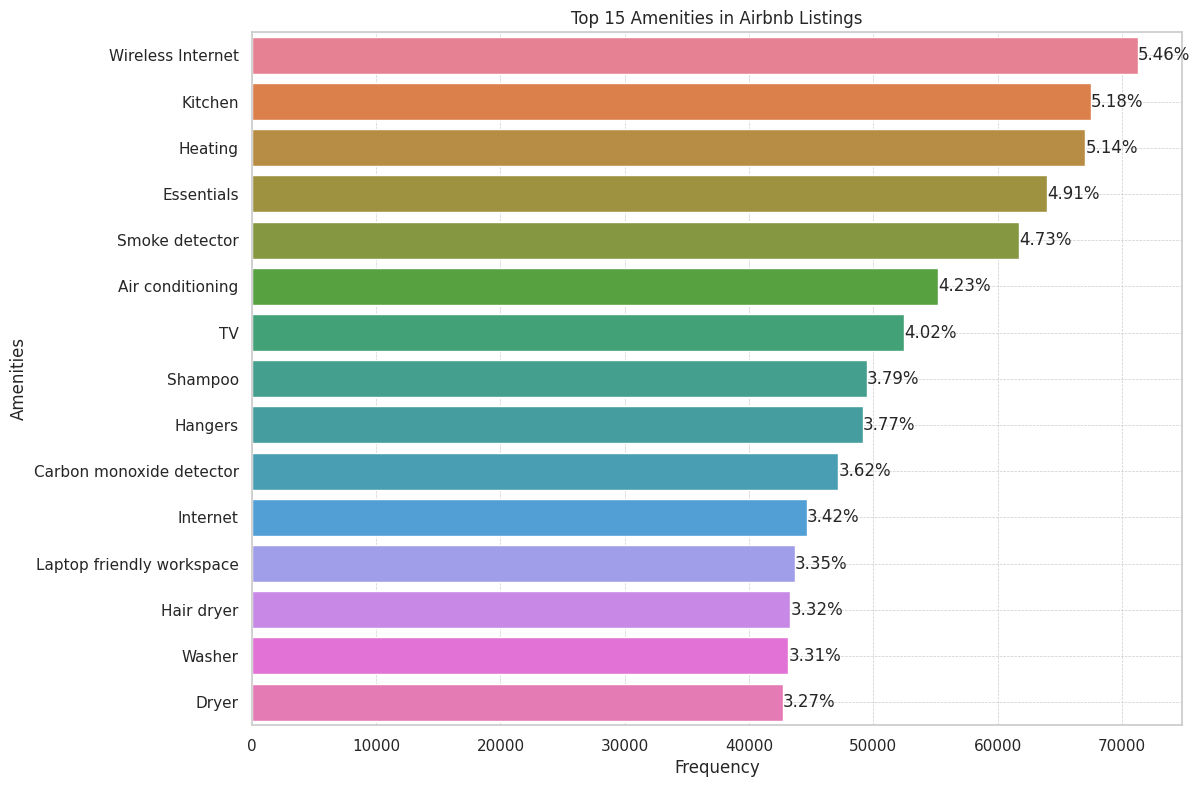

In [31]:
# visualization
def top_amenities(amenity_counts, n):
    amenities_df = pd.DataFrame(list(amenity_counts.items()), columns=['Amenity', 'Count'])
    total_count_all_amenities = amenities_df['Count'].sum()
    top_amenities_df = amenities_df.sort_values(by='Count', ascending=False).head(n)
    top_amenities_df['Percentage'] = (top_amenities_df['Count'] / total_count_all_amenities) * 100

    plt.figure(figsize=(12, 0.6 * n))
    #ax = sns.barplot(x='Count', y='Amenity', data=top_amenities_df, palette='viridis')
    ax = sns.barplot(x='Count', y='Amenity', data=top_amenities_df, hue='Amenity', legend=False)

    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 3,
                 p.get_y() + p.get_height() / 2,
                 '{:1.2f}%'.format(p.get_width() / total_count_all_amenities * 100),
                 va = 'center')

    plt.title(f'Top {n} Amenities in Airbnb Listings')
    plt.xlabel('Frequency')
    plt.ylabel('Amenities')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

top_amenities(amenity_counts, 15)

In [32]:
# Words used most often in Airbnb descriptions
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=100) # erase words like (the, which, on ....)

X = vectorizer.fit_transform(df['description'])
words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = words_df.sum(axis=0).sort_values(ascending=False)

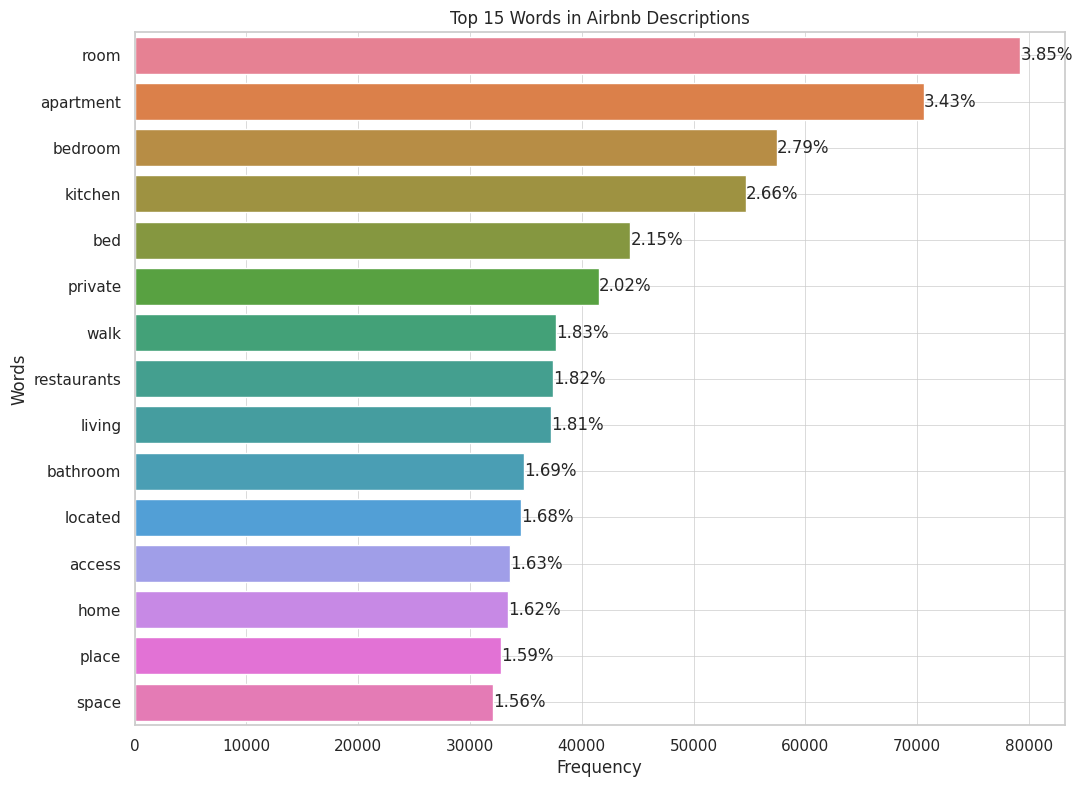

In [33]:
def top_words(word_counts, n):
    words_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])
    total_count_all_words = words_df['Count'].sum()
    top_words_df = words_df.sort_values(by='Count', ascending=False).head(n)
    top_words_df['Percentage'] = (top_words_df['Count'] / total_count_all_words) * 100

    plt.figure(figsize=(12, 0.6 * n))
    ax = sns.barplot(x='Count', y='Word', data=top_words_df, hue='Word', legend=False)

    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 3,
                 p.get_y() + p.get_height() / 2,
                 '{:1.2f}%'.format(p.get_width() / total_count_all_words * 100),
                 va='center')

    plt.title(f'Top {n} Words in Airbnb Descriptions')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.grid(True, which='both', linewidth=0.5)
    plt.show()

top_words(word_counts, 15)

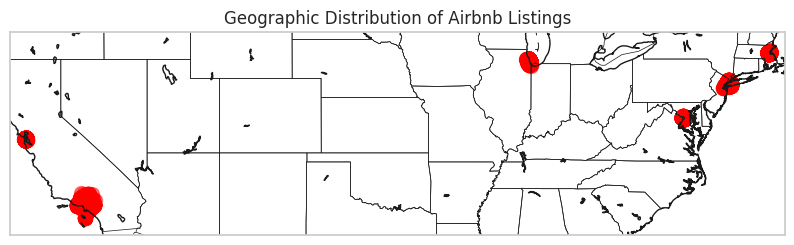

In [35]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10, 7))
m = Basemap(projection='merc', llcrnrlat=df['latitude'].min() - 1, urcrnrlat=df['latitude'].max() + 1,
            llcrnrlon=df['longitude'].min() - 1, urcrnrlon=df['longitude'].max() + 1, resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, s=100, color='red', marker='o', alpha=0.5)

plt.title('Geographic Distribution of Airbnb Listings')
plt.show()

###Data Modeling
I want to predict 'log_price' using several columns, especially by isolating 'amenities'. However, the creation of too many columns led to memory issues and caused crashes. Consequently, I've decided to focus on the top 15 most frequently occurring amenities for analysis. I'm planning to use XGBoost and CatBoost for this task.

* XGBoost

XGBoost (eXtreme Gradient Boosting) is an efficient and scalable implementation of gradient boosting framework. It is a powerful machine learning algorithm that has proven effective across a wide range of regression and classification problems. XGBoost is known for its performance and speed, particularly in structured or tabular data.

* CatBoost

CatBoost is another gradient boosting algorithm that specifically targets categorical data handling. Developed by Yandex, it provides state-of-the-art results without extensive data preprocessing like one-hot encoding. CatBoost is highly efficient, reduces the chance of overfitting, and is well-suited for scenarios with high dimensionality and large data sets

In [36]:
all_amenities = []
for amenities_list in df['amenities']:
    all_amenities.extend(amenities_list)

# frequency of amentity
amenity_counts = Counter(all_amenities)

# top 15
top_amenities = [amenity for amenity, count in amenity_counts.most_common(15)]

# make dummies
for amenity in top_amenities:
    df['amenity_' + amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)

In [37]:
# Drop columns that are not useful
df.drop(['id', 'amenities', 'description','latitude','longitude','name' ], axis=1, inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# dummies
df = pd.get_dummies(df, drop_first=True)

# split
X = df.drop('log_price', axis=1)
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# train
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# feature importance
feature_importances = model.feature_importances_

# feature to dataframe
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# top 10 f
top_features = features.head(10)['Feature'].tolist()
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

In [43]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# XGBoost
xgb_model = XGBRegressor(n_estimators=50, max_depth=5, random_state=42)
xgb_model.fit(X_train_reduced, y_train)
y_pred_xgb = xgb_model.predict(X_test_reduced)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# CatBoost
cat_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', verbose=False)
cat_model.fit(X_train_reduced, y_train)
y_pred_cat = cat_model.predict(X_test_reduced)
mse_cat = mean_squared_error(y_test, y_pred_cat)

# compare
print(f"XGBoost MSE: {mse_xgb}")
print(f"CatBoost MSE: {mse_cat}")

XGBoost MSE: 0.20841743862423648
CatBoost MSE: 0.2097607725668068


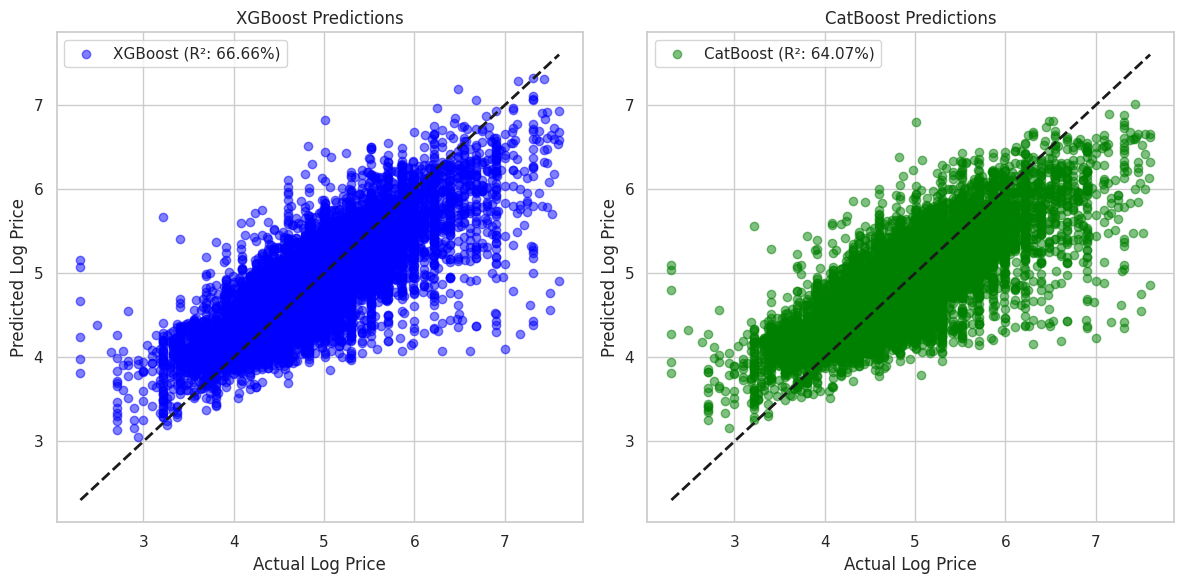

In [44]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# XGBoost train
xgb_model = XGBRegressor(n_estimators=50, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
r_squared_xgb = r2_score(y_test, y_pred_xgb)
accuracy_percentage_xgb = r_squared_xgb * 100

# CatBoost train
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', verbose=False)
catboost_model.fit(X_train, y_train)
y_pred_cat = catboost_model.predict(X_test)
r_squared_cat = r2_score(y_test, y_pred_cat)
accuracy_percentage_cat = r_squared_cat * 100


plt.figure(figsize=(12, 6))
# XGBoost
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5, label=f'XGBoost (R²: {accuracy_percentage_xgb:.2f}%)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('XGBoost Predictions')
plt.grid(True)
plt.legend()

# CatBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_cat, color='green', alpha=0.5, label=f'CatBoost (R²: {accuracy_percentage_cat:.2f}%)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('CatBoost Predictions')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

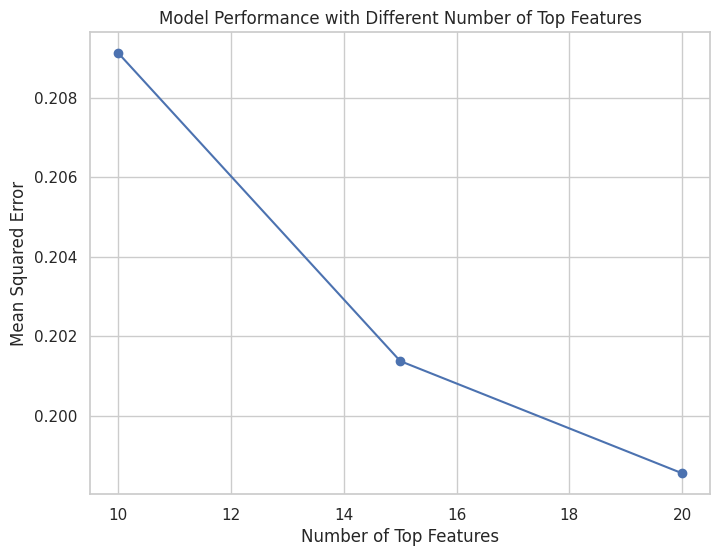

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split
X = df.drop('log_price', axis=1)
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# compare numbers of feature
top_features_counts = [10, 15, 20]
mse_results = []

for count in top_features_counts:

    top_features = features.head(count)['Feature'].tolist()
    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    # train
    model.fit(X_train_reduced, y_train)

    # predict
    y_pred = model.predict(X_test_reduced)

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)

# visual
plt.figure(figsize=(8, 6))
plt.plot(top_features_counts, mse_results, marker='o', linestyle='-', color='b')
plt.title('Model Performance with Different Number of Top Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

Adding more features does not improve the model.